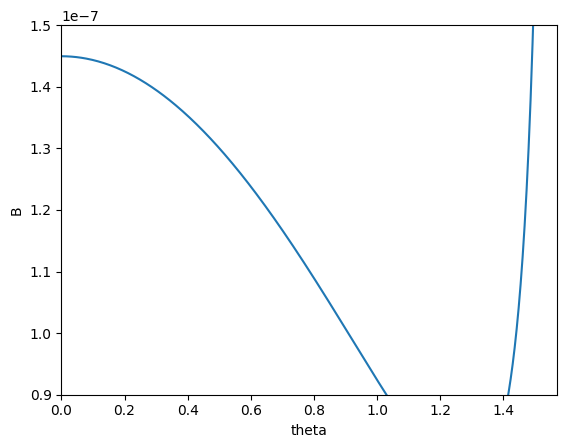

In [39]:
import numpy as np
import plasma_params as pp
import matplotlib.pyplot as plt


f=300


N = 2e6
B = 135e-9
theta_stnd = 20*np.pi/180
fc = (pp.Q*B/pp.ME)/2/np.pi
fp = ((pp.Q**2*N)/(pp.EPS*pp.ME))**(1/2)/2/np.pi

AA = fc*np.cos(theta_stnd)/f
BB = (AA-1)*pp.C**2
k_sqr = 4*(np.pi**2)*(fp**2)/BB
k = np.sqrt(k_sqr)
k_para = k*np.cos(theta_stnd)

theta = np.linspace(0, np.pi/2, 500)
CC=2*np.pi*f*pp.ME/pp.Q
DD = N*pp.MYU*pp.Q**2/pp.ME
k_perp = k_para*np.tan(theta)
EE = k_para*np.sqrt(k_para**2+k_perp**2)
FF = k_para**2+k_perp**2
B = CC*(DD+FF)/EE
plt.plot(theta, B)
plt.xlabel('theta')
plt.ylabel('B')
plt.xlim(0, np.pi/2)
plt.ylim(0.9e-7, 1.5e-7)

plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import plasma_params as pp

def calc_duct_range(f):
    N = 2e6
    B = 130e-9
    theta_stnd = 20*np.pi/180
    fc = (pp.Q*B/pp.ME)/2/np.pi
    fp = ((pp.Q**2*N)/(pp.EPS*pp.ME))**(1/2)/2/np.pi

    AA = fc*np.cos(theta_stnd)/f
    BB = (AA-1)*pp.C**2
    k_sqr = 4*(np.pi**2)*(fp**2)/BB
    k = np.sqrt(k_sqr)
    k_para = k*np.cos(theta_stnd)

    theta = np.linspace(0, np.pi/2, 500)
    CC=2*np.pi*f*pp.ME/pp.Q
    DD = N*pp.MYU*pp.Q**2/pp.ME
    k_perp = k_para*np.tan(theta)
    EE = k_para*np.sqrt(k_para**2+k_perp**2)
    FF = k_para**2+k_perp**2
    B = CC*(DD+FF)/EE*1e9
    theta = theta*180/np.pi

    return theta, B
  

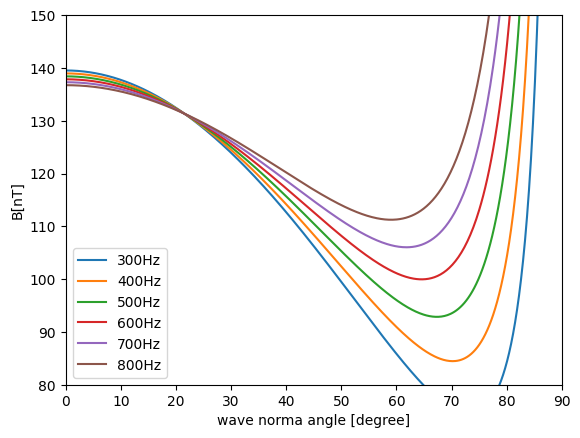

In [13]:
f = [300, 400, 500, 600, 700, 800]
for i in f:
    theta, B = calc_duct_range(i)
    plt.plot(theta, B, label=i)
plt.xlabel('wave norma angle [degree]')
plt.ylabel('B[nT]')
plt.xlim(0, 90)
plt.ylim(80, 150)
plt.legend(['{0}Hz'.format(i) for i in f])
plt.show()

/tmp/ipykernel_3997/2994540186.py:16: RuntimeWarning: invalid value encountered in sqrt
  k_perp = np.tan(theta) * np.sqrt(CC / DD - np.cos(theta_stnd) ** 2)


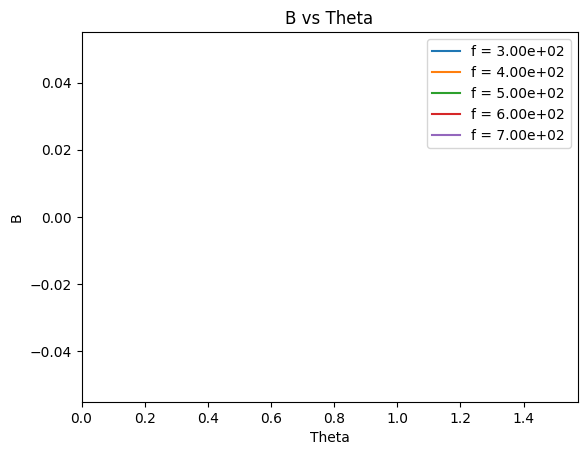

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plasma_params as pp

def calculate_and_plot(f_list):
    N = 2e6
    B = 135e-9
    theta_stnd = 20 * np.pi / 180
    fc = (pp.Q * B / pp.ME) / (2 * np.pi)
    fp = ((pp.Q ** 2 * N) / (pp.EPS * pp.ME)) ** (1 / 2) / (2 * np.pi)

    theta = np.linspace(0, np.pi / 2, 500)
    f_arr = np.array(f_list)  # f_listをNumPy配列に変換
    CC = 2 * np.pi * f_arr[:, np.newaxis] * pp.ME / pp.Q  # f_arrを使用して計算
    DD = N * pp.MYU * pp.Q ** 2 / pp.ME
    k_perp = np.tan(theta) * np.sqrt(CC / DD - np.cos(theta_stnd) ** 2)
    k_para = np.cos(theta_stnd)
    EE = k_para * np.sqrt(k_para ** 2 + k_perp ** 2)
    FF = k_para ** 2 + k_perp ** 2
    B = CC * (DD + FF) / EE

    # プロット
    for i, f in enumerate(f_list):
        plt.plot(theta, B[i, :], label='f = {:.2e}'.format(f))

    plt.xlabel('Theta')
    plt.ylabel('B')
    plt.title('B vs Theta')
    plt.legend()
    plt.show()

# テスト用のfリスト
f_list = [300, 400, 500, 600, 700]

# 関数の呼び出し
calculate_and_plot(f_list)



In [15]:
B

array([2.22050189e-08, 2.22049258e-08, 2.22046466e-08, 2.22041811e-08,
       2.22035295e-08, 2.22026917e-08, 2.22016677e-08, 2.22004577e-08,
       2.21990615e-08, 2.21974792e-08, 2.21957108e-08, 2.21937564e-08,
       2.21916160e-08, 2.21892896e-08, 2.21867773e-08, 2.21840791e-08,
       2.21811950e-08, 2.21781251e-08, 2.21748694e-08, 2.21714279e-08,
       2.21678009e-08, 2.21639882e-08, 2.21599899e-08, 2.21558061e-08,
       2.21514370e-08, 2.21468824e-08, 2.21421426e-08, 2.21372175e-08,
       2.21321073e-08, 2.21268120e-08, 2.21213318e-08, 2.21156666e-08,
       2.21098167e-08, 2.21037820e-08, 2.20975627e-08, 2.20911588e-08,
       2.20845706e-08, 2.20777979e-08, 2.20708411e-08, 2.20637002e-08,
       2.20563752e-08, 2.20488663e-08, 2.20411737e-08, 2.20332974e-08,
       2.20252375e-08, 2.20169943e-08, 2.20085678e-08, 2.19999581e-08,
       2.19911654e-08, 2.19821898e-08, 2.19730314e-08, 2.19636905e-08,
       2.19541671e-08, 2.19444614e-08, 2.19345736e-08, 2.19245038e-08,
      

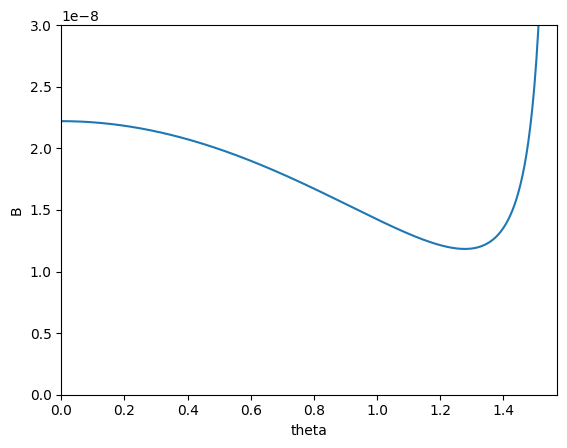

In [18]:
plt.plot(theta, B)
plt.xlabel('theta')
plt.ylabel('B')
plt.xlim(0, np.pi/2)
plt.ylim(0, 0.3e-7)

plt.show()